# <center> Zestaw 8
## <center> Ryszard Pręcikowski
### <center> 401433

# Zadanie 1
<hr>

Przedstaw każde z poniższych równań różniczkowych zwyczajnychjako równoważny układ równań pierwszego rzędu (ang.first-order  system  ofODEs):

a) równanie Van der Pol'a:

$$y'' = y'(1-y^2)-y)$$

$$y = y_0$$
$$y' = y_0' = y_1$$

$$y_1' = y_1(1-y_0^2)-y_0$$


b) równanie Blasiusa:  
$$y''' = -yy''$$ 

$$y_0 = y$$
$$y_1 = y' = y_0'$$
$$y_2 = y'' = y_1'$$

$$y_2' = -y_0y_2$$

<br>
c) II zasada dynamiki Newtona dla problemu dwóch ciał <br>
$$x'' = -GMx/r^3$$
$$y'' = -GMy/r^3$$
gdzie $r = (x^2+y^2)^{1/2}$

$$x_0 = x$$
$$x_1 = x_0'$$

$$x_1' = -GMx_0/r^3$$

$$y_0 = y$$
$$y_1 = y_0'$$

$$y_1' = -GMy_0/r^3$$

# Zadanie 2
<hr>

Dane jest równanie różniczkowe zwyczajne $$y′=−5y$$ z warunkiem początkowym $y(0) = 1$. <br>
Równanie rozwiązujemy numerycznie zkrokiem $h= 0.5$.

$y' = -5y$

$\frac1y y' = -5$

$\int \frac1y dy = \ln y + C_1$

$\int -5 dt = -5t + C_2$

$$y = C\cdot e^{-5t}$$

$y(0) = 1$

$C\cdot e^0 = 1 $

$C = 1$

$$y = e^{-5t}$$

$y(0.5) = e^{-5\cdot 0.5} = 0.082$

a) Rozwiązania powyższego równania są stabilne, wraz ze wzrostem t wykładnik maleje.

b) Metoda Euler'a nie jest stabilna z użytym krokiem h.

$y_{k+1} = y_k + h \cdot (-5) \cdot y_k = (1 + h \cdot (-5))\cdot y_k$

$y_k = (1 + 0.5 \cdot (-5))^k y_0 = (-1.5)^k y_0$

Skoro $|-1.5| > 1$ to oznacza, że metoda nie jest stabilna.

c) Wartość przybliżonego rozwiązania dla $t = 0.5$ metodą Eulera.

$y_0 = y(0) = 1$

$y_1 = y_0 + 0.5\cdot y'(1) = y_0 + 0.5 \cdot (-5)\cdot y_0$

$y_1 = 1 + 0.5 \cdot (-5) \cdot 1$

$y_1 = -1.5$

d) Niejawna metoda Eulera jest stabilna dla zadanego kroku h.

$y_{k+1} = y_k + h \cdot (-5) \cdot y_{k+1}$

$y_k = (1 - 0.5 \cdot (-5) \cdot y_{k+1}$

$y_k = 3.5 \cdot y_{k+1}$

$y_k = (\frac{1}{3.5})^k y_0$

Skoro $|\frac{1}{3.5}| = 0.286 < 1$ to oznacza, że metoda jest stabilna. 


e) Wartość przybliżonego rozwiązania dla $t = 0.5$ niejawną metodą Eulera.

$y_1 = y_0 + h \cdot y'(y_1) = 1 + 0.5 \cdot (-5) y_1 = 1 -2.5y_1$

$y_1 = \frac{1}{3.5} = 0.286$

# Zadanie 3

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (5,5)

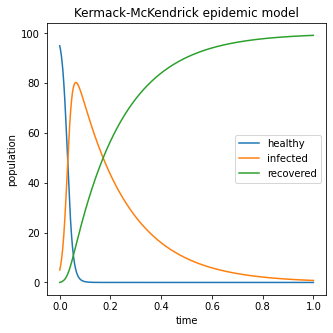

In [2]:
c = 1 # transmission rate
d = 5 # removal rate

def rhs(s, v):
    global c, d
    return [-c*v[0]*v[1],
            c*v[0]*v[1] - d * v[1],
            d * v[1]]
res = solve_ivp(rhs, (0, 1), [95, 5, 0], t_eval=np.linspace(0,1, 1000))
y1, y2, y3 = res.y

plt.plot(res.t, y1, label="healthy")
plt.plot(res.t, y2, label="infected")
plt.plot(res.t, y3, label="recovered")
plt.legend()
plt.xlabel("time")
plt.ylabel("population")
plt.title("Kermack-McKendrick epidemic model")
plt.show()

# zadanie 4

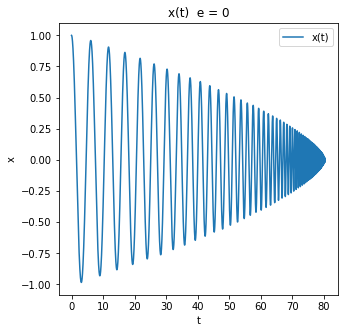

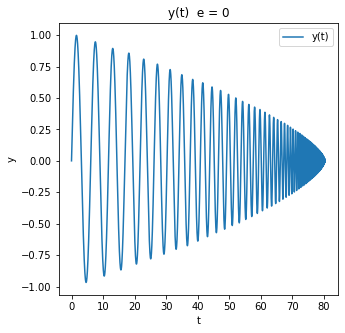

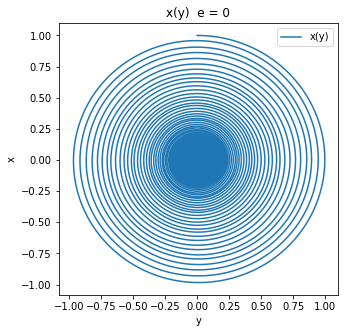

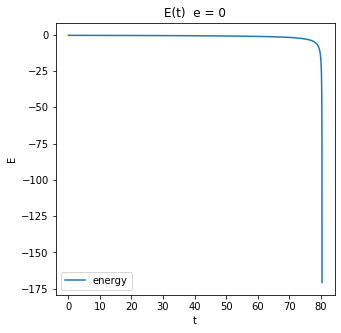

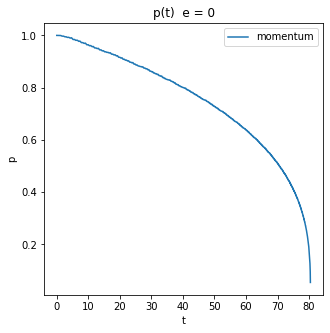

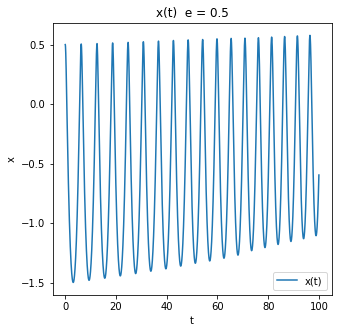

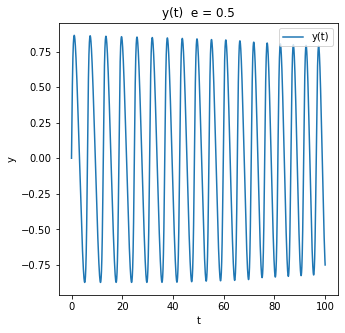

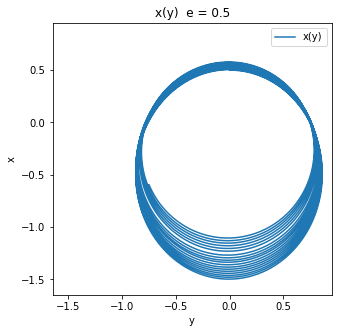

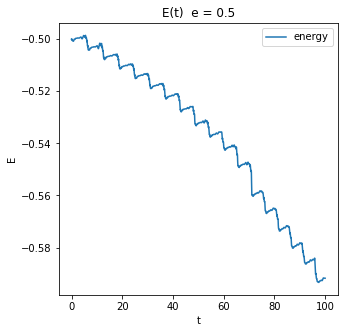

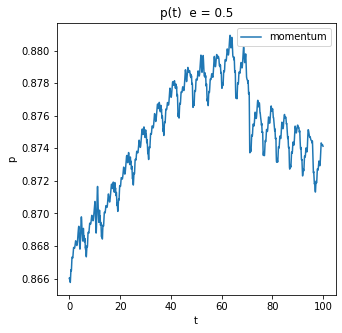

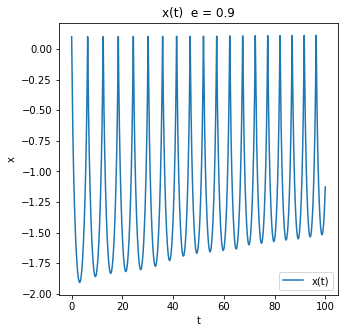

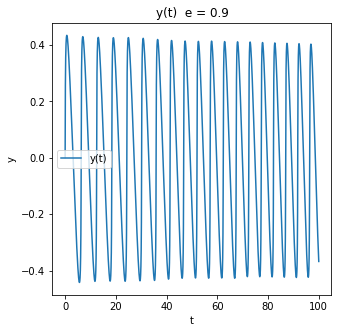

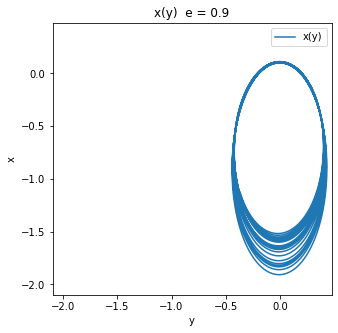

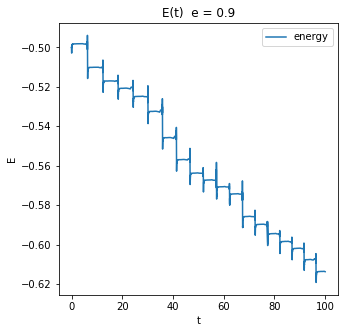

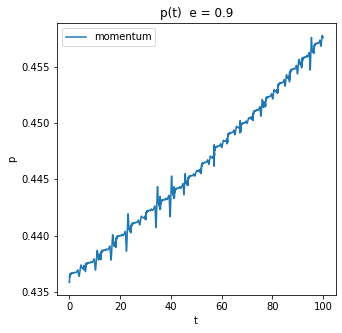

In [3]:
x_0 = 0
x_1 = 1
y_0 = 2
y_1 = 3

def solver(s, v):
    global x_0, x_1, y_0, y_1
    r = (v[x_0] ** 2 + v[y_0] ** 2) ** (1/2)
    return [v[x_1],
            -v[x_0] / r ** 3,
            v[y_1],
            -v[y_0] / r ** 3]

def plot(t, x, x_prim, y, y_prim):
    def plot_one(x, y, label = "y", xlabel="t", ylabel="y"):
        plt.plot(x, y, label=label)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        global e
        plt.title("{y}({x})  e = {e}".format(y=ylabel, x=xlabel, e=e))
        plt.legend()
        plt.show()


    plot_one(t, x, label="x(t)", ylabel="x")

    plot_one(t, y, label="y(t)", ylabel="y")


    x_min, x_max = min(x), max(x)
    y_min, y_max = min(y), max(y)

    lim = (min(x_min, y_min), max(x_max, y_max))
    lim = (lim[0]*1.1, lim[1]*1.1)
    plt.xlim(lim)
    plt.ylim(lim)
    plot_one(y, x, label="x(y)", xlabel="y", ylabel="x")


    r = (x**2 + y**2)**(1/2)
    energy = (x_prim**2 + y_prim**2) / 2 - 1/r
    plot_one(t, energy, label='energy', ylabel='E')


    momentum = x * y_prim - y * x_prim
    plot_one(t, momentum, label='momentum', ylabel='p')

e_values = [0, 0.5, 0.9]
for e in e_values:
    starting = [
        1 - e, # x(0)
        0,     # x'(0)
        0,     # y(0)
        ((1 + e) / (1 - e))**(1/2) #y'(0)
    ]
    a = 0
    b = 100
    _t = np.linspace(a, b, (b-a) * 100)
    res = solve_ivp(solver, (a, b), starting, t_eval=_t)

    plot(res.t, *res.y)
